<a href="https://colab.research.google.com/github/Megacity1/CartpoleDQN/blob/main/Week%203%20Deep%20RL%202/CartPoleDQN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Q Network (DQN) for CartPole Using Boltzmann Q Policy
This exercise implements a DQN for CartPole using a Boltzmann Q policy for selecting the actions

In [57]:
# install keras rl2 (we need to install keras-rl2 so it works with the tensorflow 2 version that comes pre-installed with colab)
!pip install keras-rl2

In [58]:
!pip install gym

In [62]:
# load the gym module
import gym
import matplotlib.pyplot as plt
# import the usual Keras modules for creating deep neural networks
from keras import Sequential
from keras.layers import Input, Flatten, Dense
!pip install Adam
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
ENV_NAME = 'CartPole-v0'
env = gym.make(ENV_NAME)

Implementation of DQN for CartPole, applying policy BoltzmannQPolicy

##Implement DQN with BoltzmannGumbelQPolicy

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_33 (Flatten)        (None, 4)                 0         
                                                                 
 dense_67 (Dense)            (None, 16)                80        
                                                                 
 dense_68 (Dense)            (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 6000 steps ...


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   14/6000: episode: 1, duration: 2.073s, episode steps:  14, steps per second:   7, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.357 [0.000, 1.000],  loss: --, mae: --, mean_q: --, mean_eps: --


/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


   28/6000: episode: 2, duration: 6.024s, episode steps:  14, steps per second:   2, episode reward: 14.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.143 [0.000, 1.000],  loss: 0.495308, mae: 0.559647, mean_q: -0.079533, mean_eps: 0.275000
   38/6000: episode: 3, duration: 0.126s, episode steps:  10, steps per second:  79, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.405486, mae: 0.517495, mean_q: -0.014644, mean_eps: 0.200000


/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   50/6000: episode: 4, duration: 0.159s, episode steps:  12, steps per second:  76, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.167 [0.000, 1.000],  loss: 0.332634, mae: 0.469260, mean_q: 0.104848, mean_eps: 0.200000
   63/6000: episode: 5, duration: 0.174s, episode steps:  13, steps per second:  75, episode reward: 13.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.154 [0.000, 1.000],  loss: 0.282886, mae: 0.428036, mean_q: 0.230231, mean_eps: 0.200000
   73/6000: episode: 6, duration: 0.136s, episode steps:  10, steps per second:  74, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.253495, mae: 0.394705, mean_q: 0.331508, mean_eps: 0.200000
   84/6000: episode: 7, duration: 0.143s, episode steps:  11, steps per second:  77, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.217944, mae: 0.361479, mean_q: 0.455927, mean_eps: 0.200

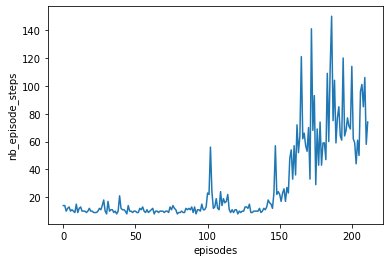

Testing for 20 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 58.000, steps: 58
Episode 3: reward: 77.000, steps: 77
Episode 4: reward: 73.000, steps: 73
Episode 5: reward: 143.000, steps: 143
Episode 6: reward: 91.000, steps: 91
Episode 7: reward: 96.000, steps: 96
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 155.000, steps: 155
Episode 10: reward: 95.000, steps: 95
Episode 11: reward: 71.000, steps: 71
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 103.000, steps: 103
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 91.000, steps: 91
Episode 16: reward: 114.000, steps: 114
Episode 17: reward: 52.000, steps: 52
Episode 18: reward: 72.000, steps: 72
Episode 19: reward: 161.000, steps: 161
Episode 20: reward: 151.000, steps: 151


In [84]:
import rl
from rl.memory import SequentialMemory  # import the exerience replay buffer module
from rl.policy import BoltzmannGumbelQPolicy
from rl.policy import LinearAnnealedPolicy
from rl.policy import EpsGreedyQPolicy
from rl.agents.dqn import DQNAgent      # import the DQN agent

# setup experience replay buffer
memory = SequentialMemory(limit=10000, window_length=1)

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), 
                               attr='eps',            
                               value_max=2.,
                               value_min=.2, 
                               value_test=.05,
                               nb_steps=20)
# Q-Network
model = Sequential()
model.add(Input(shape=(1,env.observation_space.shape[0])))  # The input is 1 observation vector, and the number of observations in that vector 
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# add extra layers here
model.add(Dense(env.action_space.n, activation='linear'))   # the output is the number of actions in the action space

print(model.summary())

# define the agent
dqn = DQNAgent(model=model, 
               nb_actions=env.action_space.n,
               memory=memory,
               nb_steps_warmup=15,
               target_model_update=1e-2, 
               policy=policy) 

dqn.compile(Adam(lr=1e-3), metrics=['mae'])

history = dqn.fit(env, nb_steps=6000, visualize=False, verbose=2)

# summarize the history for number  of episode steps
plt.plot(history.history['nb_episode_steps'])
plt.ylabel('nb_episode_steps')
plt.xlabel('episodes')
plt.show()

dqn.test(env, nb_episodes=20, visualize=False)